# element volume versus equilibrium step size
- testing the courant condition

In [1]:
%matplotlib inline
from lib.my_initialization import *
from lib.controller.integrate_forward_dormand_prince_asynchronous import *
%autocall 1
%load_ext autoreload
%autoreload 2

Automatic calling is: Smart


In [2]:
#TODOfirst, verify whether any two show a different equilibrium step size
#define Lamé parameters
mu = 1.; lam = 10.; 
#define coefficient for Rayleigh damping
gamma = .05#1.#1.;

#define adaptive time stepping absolute tolerances
salience = 2#128#32
learning_rate = np.log(salience) #np.log(16) #np.log(2)
lasso_fraction = 0.5
v_scale = 2.
mass_density=1.

stepsize_init = 0.0025;atol_x = 0.0001;atol_v = 0.0001;btol_x = 0.00001;btol_v = 0.00001

#path to mesh
input_file_name = f'../data/spherical_meshes/spherical_mesh_400.stl'
#where to save results
data_folder =  os.path.join(nb_dir,'../data/mov_csv')
data_fn = f"avi_es_variable_lr_a_equal_b_{os.path.basename(input_file_name).replace('.stl',f'_mu_{mu}_lambda_{lam}_gamma_{gamma}_vscale_{v_scale}_stepsizeinit_{stepsize_init}')}_salience_{salience}_atolx_{atol_x}.csv"
os.chdir(data_folder)
os.path.exists(data_fn)

False

In [3]:
os.chdir(data_folder)
fnA = "avi_es_variable_lr_a_equal_b_spherical_mesh_400_mu_1.0_lambda_10.0_gamma_0.05_vscale_2.0_stepsizeinit_0.0025_salience_0.5_atolx_0.0001.csv"
fnB = "avi_es_fixed_lr_a_equal_b_spherical_mesh_100_mu_1.0_lambda_10.0_gamma_0.0_vscale_1.0_stepsizeinit_0.0001_salience_2_atolx_0.0001.csv"
# fnB = "avi_es_fixed_lr_a_equal_b_spherical_mesh_100_mu_1.0_lambda_10.0_gamma_0.0_vscale_2.0_stepsizeinit_0.0001_salience_2_atolx_0.0001.csv"
# fnB = "avi_es_variable_lr_a_equal_b_spherical_mesh_400_mu_1.0_lambda_10.0_gamma_0.05_vscale_2.0_stepsizeinit_0.0025_salience_0.5_atolx_0.0001.csv"
# fnB = "avi_esynchronous_fixed_lr_a_equal_b_spherical_mesh_400_mu_1.0_lambda_10.0_gamma_0.0_vscale_1.0_stepsizeinit_0.0001_salience_2_atolx_0.0001.csv"
os.path.exists(fnB)

True

In [4]:
df = pd.read_csv(fnB)
# df.head()
df['stepsize_std'].describe()

count    300.000000
mean       0.005095
std        0.000902
min        0.000929
25%        0.004502
50%        0.005076
75%        0.005765
max        0.006985
Name: stepsize_std, dtype: float64

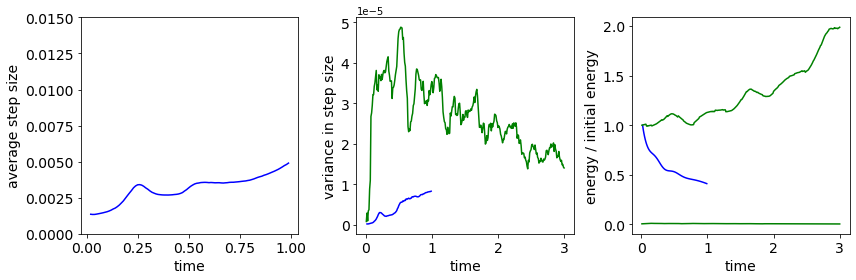

In [5]:
fig, axs = plt.subplots(figsize = (12,4), ncols = 3)
bins = 30
axkwargs = {
    'fontsize':14,
    
}
hkwargs = {
    'color':'blue',#'orange',
    'cumulative':False,
    'stacked':True,
    'log':False,
    'density':False,
    'bins':bins
}

ax = axs[0]
color_lst = ['blue', 'green']
fn_lst = [fnA, fnB]
# color_lst = ['green']
# fn_lst = [ fnB]
for color,fn in zip(color_lst,fn_lst):
    df = pd.read_csv(fn)
    x_values = np.array(df['t'])
    y_values = np.array(df['stepsize_mean'])
    ax.plot(x_values, y_values, color=color, alpha=1.)
#     ax.fill_between(x_values, y_values-df['stepsize_std'],y_values+df['stepsize_std'], alpha=0.2, color=color)
    ax.set_xlabel('time',**axkwargs)
    ax.set_ylabel('average step size',**axkwargs)
    # plt.xticks(**axkwargs)
    ax.tick_params(labelsize=axkwargs['fontsize'])

    ax = axs[1]
    x_values = np.array(df['t'])
    y_values = np.array(df['stepsize_std']**2)
    ax.plot(x_values, y_values, color=color)
    # ax.fill_between(x_values, y_values-stepsize_std_lst,y_values+stepsize_std_lst, alpha=0.2)
    ax.set_xlabel('time',**axkwargs)
    ax.set_ylabel('variance in step size',**axkwargs)
    ax.tick_params(labelsize=axkwargs['fontsize'])

    ax = axs[2]
    energy_lst = list(df['energy'].values)
    x_values = np.array(df['t'])
    y_values = np.array(energy_lst)/energy_lst[0]#[s**2/m for s,m in zip(stepsize_std_lst,stepsize_mean_lst)])
    ax.plot(x_values, y_values, color=color)
    # ax.fill_between(x_values, y_values-stepsize_std_lst,y_values+stepsize_std_lst, alpha=0.2)
    ax.set_xlabel('time',**axkwargs)
    ax.set_ylabel('energy / initial energy',**axkwargs)
    ax.tick_params(labelsize=axkwargs['fontsize'])

ax = axs[0]
ax.set_ylim([0.,0.015])
# ax = axs[2]
# x_values = np.array(tme_lst)
# y_values = np.array(volume_lst)/volume_lst[0]#[s**2/m for s,m in zip(stepsize_std_lst,stepsize_mean_lst)])
# ax.plot(x_values, y_values)
# # ax.fill_between(x_values, y_values-stepsize_std_lst,y_values+stepsize_std_lst, alpha=0.2)
# ax.set_xlabel('time',**axkwargs)
# ax.set_ylabel('volume / initial volume',**axkwargs)
# ax.tick_params(labelsize=axkwargs['fontsize'])

plt.tight_layout()
plt.show()

In [55]:
df.head()

,t,volume,energy,stepsize_mean,stepsize_std,stepsize_median
0,0.01,3.903673,0.396590,0.006102,0.000929,0.0064
1,0.02,3.865821,0.397428,0.006474,0.001713,0.0064
2,0.03,3.830659,0.397944,0.006230,0.000998,0.0064
3,0.04,3.799127,0.398858,0.006826,0.001857,0.0064
4,0.05,3.771769,0.399242,0.006885,0.001940,0.0064


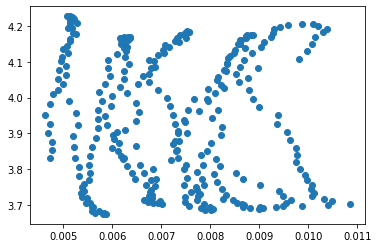

In [10]:
y_values = df['volume']
x_values = df['stepsize_mean']
plt.scatter(x_values,y_values)

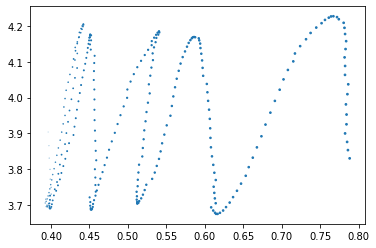

In [14]:
y_values = df['volume']
x_values = df['energy']
c_values = df['t']
plt.scatter(x_values,y_values,c_values,cmap='Blues')

In [30]:
targ = 'spherical_mesh_'
loc = fnA.find(targ)
mesh_size = eval(fnA[loc+len(targ):].split('_')[0])

mesh_folder = os.path.join(nb_dir,'../data/spherical_meshes')
os.chdir(mesh_folder)
mesh_fn = f"spherical_mesh_{mesh_size}.stl"

In [41]:
os.chdir(data_folder)
ls = !ls
for fn in ls:
    loc = fn.find(targ)
    if loc>0:
        mesh_size = eval(fn[loc+len(targ):].split('_')[0].split('.')[0])
        if mesh_size==100:
            print(fn)

avi_es_counts_fixed_lr_a_equal_b_spherical_mesh_100_mu_1.0_lambda_10.0_gamma_0.0_vscale_1.0_stepsizeinit_0.0001_salience_2_atolx_0.0001.npy
avi_es_counts_spherical_mesh_100_mu_1.0_lambda_10.0_gamma_0.0.npy.npz
avi_es_fixed_lr_a_equal_b_spherical_mesh_100_mu_1.0_lambda_10.0_gamma_0.0_vscale_1.0_stepsizeinit_0.0001_salience_2_atolx_0.0001.csv
avi_es_fixed_lr_a_equal_b_spherical_mesh_100_mu_1.0_lambda_10.0_gamma_0.0_vscale_2.0_stepsizeinit_0.0001_salience_2_atolx_0.0001.csv
avi_es_spherical_mesh_100_mu_1.0_lambda_10.0_gamma_0.0.csv
avi_esynchronous_counts_fixed_lr_a_equal_b_spherical_mesh_100_mu_1.0_lambda_10.0_gamma_0.0_vscale_1.0_stepsizeinit_0.0001_salience_2_atolx_0.0001.npy
avi_esynchronous_fixed_lr_a_equal_b_spherical_mesh_100_mu_1.0_lambda_10.0_gamma_0.0_vscale_1.0_stepsizeinit_0.0001_salience_2_atolx_0.0001.csv
avi_is_spherical_mesh_100.stl_mu_1.0_lambda_1.0_gamma_1.0.csv
avi_is_spherical_mesh_100_mu_1.0_lambda_10.0_gamma_0.0.csv
avi_ns_a_equal_b_spherical_mesh_100_mu_1.0_lambda_1

count    1.720000e+02
mean     1.355253e-20
std      1.509026e-36
min      1.355253e-20
25%      1.355253e-20
50%      1.355253e-20
75%      1.355253e-20
max      1.355253e-20
Name: stepsize_std, dtype: float64

In [33]:
fn[loc+len(targ):].split('_')

['100.stl', 'mu', '1.0', 'lambda', '1.0', 'gamma', '1.0.csv']

In [35]:
'100.stl'.split('.')[0]

'100'

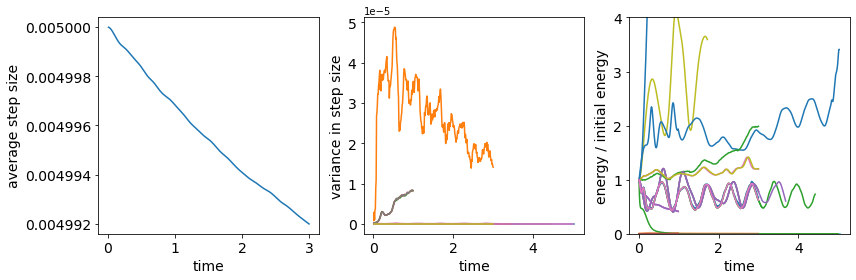

In [77]:
fig, axs = plt.subplots(figsize = (12,4), ncols = 3)
bins = 30
axkwargs = {
    'fontsize':14,
    
}
hkwargs = {
    'color':'blue',#'orange',
    'cumulative':False,
    'stacked':True,
    'log':False,
    'density':False,
    'bins':bins
}

ax = axs[0]
# color_lst = [None, None]
fn_lst = [fn for fn in os.listdir() if fn.find('.csv')!=-1]
# fn_lst = !grep *.csv
#[fnA, fnB]
# color_lst = ['green']
# fn_lst = [ fnB]
os.chdir(data_folder)
color = None
# for color,fn in zip(color_lst,fn_lst):
for fn in fn_lst:
    df = pd.read_csv(fn)
    x_values = np.array(df['t'])
    y_values = np.array(df['stepsize_mean'])
    ax.plot(x_values, y_values, color=color, alpha=1.)
#     ax.fill_between(x_values, y_values-df['stepsize_std'],y_values+df['stepsize_std'], alpha=0.2, color=color)
    ax.set_xlabel('time',**axkwargs)
    ax.set_ylabel('average step size',**axkwargs)
#     ax.set_yscale('log')
    # plt.xticks(**axkwargs)
    ax.tick_params(labelsize=axkwargs['fontsize'])

    ax = axs[1]
    x_values = np.array(df['t'])
    y_values = np.array(df['stepsize_std']**2)
    ax.plot(x_values, y_values, color=color)
    # ax.fill_between(x_values, y_values-stepsize_std_lst,y_values+stepsize_std_lst, alpha=0.2)
    ax.set_xlabel('time',**axkwargs)
    ax.set_ylabel('variance in step size',**axkwargs)
    ax.tick_params(labelsize=axkwargs['fontsize'])

    ax = axs[2]
    energy_lst = list(df['energy'].values)
    x_values = np.array(df['t'])
    y_values = np.array(energy_lst)/energy_lst[0]#[s**2/m for s,m in zip(stepsize_std_lst,stepsize_mean_lst)])
    ax.plot(x_values, y_values, color=color)
    # ax.fill_between(x_values, y_values-stepsize_std_lst,y_values+stepsize_std_lst, alpha=0.2)
    ax.set_xlabel('time',**axkwargs)
    ax.set_ylabel('energy / initial energy',**axkwargs)
    ax.tick_params(labelsize=axkwargs['fontsize'])
    ax.set_ylim([0,4])
    
ax = axs[0]
# ax.set_ylim([0.,0.015])
# ax = axs[2]
# x_values = np.array(tme_lst)
# y_values = np.array(volume_lst)/volume_lst[0]#[s**2/m for s,m in zip(stepsize_std_lst,stepsize_mean_lst)])
# ax.plot(x_values, y_values)
# # ax.fill_between(x_values, y_values-stepsize_std_lst,y_values+stepsize_std_lst, alpha=0.2)
# ax.set_xlabel('time',**axkwargs)
# ax.set_ylabel('volume / initial volume',**axkwargs)
# ax.tick_params(labelsize=axkwargs['fontsize'])

plt.tight_layout()
plt.show()

In [71]:
ls = [fn for fn in os.listdir() if fn.find('.csv')!=-1]

['avi_ns_a_equal_b_spherical_mesh_100_mu_1.0_lambda_1.0_gamma_0.0vscale_2.0_stepsizeinit_0.005.csv',
 'avi_is_spherical_mesh_100_mu_1.0_lambda_10.0_gamma_0.0.csv',
 'avi_es_variable_lr_a_equal_b_spherical_mesh_400_mu_1.0_lambda_10.0_gamma_0.05_vscale_2.0_stepsizeinit_0.0025_salience_0.5_atolx_0.0001.csv',
 'avi_esynchronous_fixed_lr_a_equal_b_spherical_mesh_100_mu_1.0_lambda_10.0_gamma_0.0_vscale_1.0_stepsizeinit_0.0001_salience_2_atolx_0.0001.csv',
 'avi_ns_a_equal_b_spherical_mesh_100_mu_1.0_lambda_1.0_gamma_0.0vscale_2.0_stepsizeinit_0.005_salience_32.csv',
 'avi_ns_a_equal_b_spherical_mesh_100_mu_1.0_lambda_10.0_gamma_0.0vscale_2.0_stepsizeinit_0.005.csv',
 'avi_es_spherical_mesh_100_mu_1.0_lambda_10.0_gamma_0.0.csv',
 'avi_ns_a_equal_b_spherical_mesh_100_mu_1.0_lambda_1.0_gamma_0.0vscale_2.0_stepsizeinit_5e-05_salience_128_atolx_0.0001.csv',
 'esvi_sphere_100.csv',
 'avi_es_fixed_lr_a_equal_b_spherical_mesh_100_mu_1.0_lambda_10.0_gamma_0.0_vscale_2.0_stepsizeinit_0.0001_salience_2

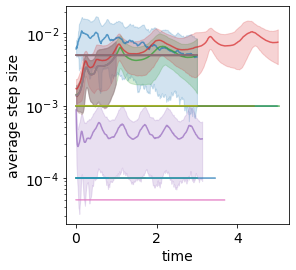

In [93]:
fig, axs = plt.subplots(figsize = (4,4), ncols = 1)
bins = 30
axkwargs = {
    'fontsize':14,
    
}
hkwargs = {
    'color':'blue',#'orange',
    'cumulative':False,
    'stacked':True,
    'log':False,
    'density':False,
    'bins':bins
}

ax = axs
# color_lst = [None, None]
fn_lst = sorted([fn for fn in os.listdir() if fn.find('.csv')!=-1])
# fn_lst = !grep *.csv
#[fnA, fnB]
# color_lst = ['green']
# fn_lst = [ fnB]
os.chdir(data_folder)
color = None
# for color,fn in zip(color_lst,fn_lst):
for fn in fn_lst:
    df = pd.read_csv(fn)
    x_values = np.array(df['t'])
    y_values = np.array(df['stepsize_mean'])
    p = ax.plot(x_values, y_values, color=color, alpha=.7)
    clr = p[0].get_color()
    ax.fill_between(x_values, y_values-df['stepsize_std'],y_values+df['stepsize_std'], alpha=0.2, color=clr)
    ax.set_xlabel('time',**axkwargs)
    ax.set_ylabel('average step size',**axkwargs)
    ax.set_yscale('log')
    # plt.xticks(**axkwargs)
    ax.tick_params(labelsize=axkwargs['fontsize'])


#1f77b4 avi_es_fixed_lr_a_equal_b_spherical_mesh_100_mu_1.0_lambda_10.0_gamma_0.0_vscale_1.0_stepsizeinit_0.0001_salience_2_atolx_0.0001.csv
#ff7f0e avi_es_fixed_lr_a_equal_b_spherical_mesh_100_mu_1.0_lambda_10.0_gamma_0.0_vscale_2.0_stepsizeinit_0.0001_salience_2_atolx_0.0001.csv
#2ca02c avi_es_spherical_mesh_100_mu_1.0_lambda_10.0_gamma_0.0.csv
#d62728 avi_es_variable_lr_a_equal_b_spherical_mesh_400_mu_1.0_lambda_10.0_gamma_0.05_vscale_2.0_stepsizeinit_0.0025_salience_0.5_atolx_0.0001.csv
#9467bd avi_es_variable_lr_a_equal_b_spherical_mesh_400_mu_1.0_lambda_10.0_gamma_0.05_vscale_2.0_stepsizeinit_0.0025_salience_4_atolx_0.0001.csv
#8c564b avi_es_variable_lr_spherical_mesh_400_mu_1.0_lambda_10.0_gamma_0.05_vscale_2.0_salience_2_stepsizeinit_0.0025_atolx_0.0001_btolx_1e-05.csv
#e377c2 avi_esynchronous_fixed_lr_a_equal_b_spherical_mesh_100_mu_1.0_lambda_10.0_gamma_0.0_vscale_1.0_stepsizeinit_0.0001_salience_2_atolx_0.0001.csv
#7f7f7f avi_esynchronous_fixed_lr_a_equal_b_spherical_mesh_40

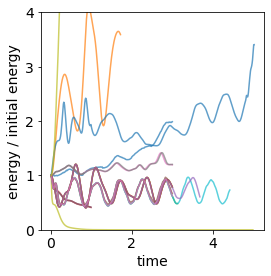

In [92]:
fig, axs = plt.subplots(figsize = (4,4), ncols = 1)
bins = 30
axkwargs = {
    'fontsize':14,
    
}
hkwargs = {
    'color':'blue',#'orange',
    'cumulative':False,
    'stacked':True,
    'log':False,
    'density':False,
    'bins':bins
}

ax = axs
# color_lst = [None, None]
fn_lst = sorted([fn for fn in os.listdir() if fn.find('.csv')!=-1])
# fn_lst = !grep *.csv
#[fnA, fnB]
# color_lst = ['green']
# fn_lst = [ fnB]
os.chdir(data_folder)
color = None
# for color,fn in zip(color_lst,fn_lst):
for fn in fn_lst:
    df = pd.read_csv(fn)

    energy_lst = list(df['energy'].values)
    x_values = np.array(df['t'])
    y_values = np.array(energy_lst)/energy_lst[0]#[s**2/m for s,m in zip(stepsize_std_lst,stepsize_mean_lst)])
    
    p = ax.plot(x_values, y_values, color=color, alpha=.7)
    clr = p[0].get_color()
    ax.set_xlabel('time',**axkwargs)
    ax.set_ylabel('energy / initial energy',**axkwargs)
    ax.tick_params(labelsize=axkwargs['fontsize'])
    ax.set_ylim([0,4])
    print(clr,fn)

# consider these nice neural evolutions

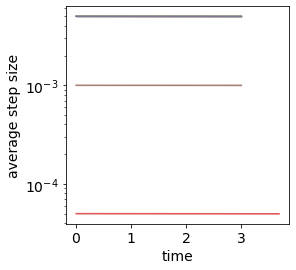

In [95]:
fig, axs = plt.subplots(figsize = (4,4), ncols = 1)
bins = 30
axkwargs = {
    'fontsize':14,
    
}
hkwargs = {
    'color':'blue',#'orange',
    'cumulative':False,
    'stacked':True,
    'log':False,
    'density':False,
    'bins':bins
}

ax = axs
# color_lst = [None, None]
fn_lst = sorted([fn for fn in os.listdir() if fn.find('.csv')!=-1])
# fn_lst = !grep *.csv
#[fnA, fnB]
# color_lst = ['green']
# fn_lst = [ fnB]
os.chdir(data_folder)
color = None
# for color,fn in zip(color_lst,fn_lst):
for fn in fn_lst_myneural:
    df = pd.read_csv(fn)
    x_values = np.array(df['t'])
    y_values = np.array(df['stepsize_mean'])
    p = ax.plot(x_values, y_values, color=color, alpha=.7)
    clr = p[0].get_color()
    ax.fill_between(x_values, y_values-df['stepsize_std'],y_values+df['stepsize_std'], alpha=0.2, color=clr)
    ax.set_xlabel('time',**axkwargs)
    ax.set_ylabel('average step size',**axkwargs)
    ax.set_yscale('log')
    # plt.xticks(**axkwargs)
    ax.tick_params(labelsize=axkwargs['fontsize'])


In [96]:
df

,t,volume,energy,stepsize_mean,stepsize_std,stepsize_median
0,0.01,3.904310,0.390139,0.001000,3.310084e-09,0.001000
1,0.02,3.870295,0.374464,0.001000,1.378265e-08,0.001000
2,0.03,3.843707,0.353211,0.001000,2.933109e-08,0.001000
3,0.04,3.825377,0.330488,0.001000,4.766661e-08,0.001000
4,0.05,3.814862,0.310684,0.001000,6.710009e-08,0.001000
...,...,...,...,...,...,...
295,2.96,3.940226,0.273683,0.000999,1.737267e-06,0.000999
296,2.97,3.939854,0.263514,0.000999,1.741619e-06,0.000999
297,2.98,3.939433,0.254947,0.000999,1.745667e-06,0.000999
298,2.99,3.939000,0.248452,0.000999,1.749750e-06,0.000999


# plot all synchronous/asynchronous

4.8470851545404425e-06, avi_es_fixed_lr_a_equal_b_spherical_mesh_1000_mu_1.0_lambda_10.0_gamma_0.05_vscale_2.0_stepsizeinit_0.005_salience_2_atolx_0.0001.csv
2.6765431984138072e-05, avi_es_fixed_lr_a_equal_b_spherical_mesh_100_mu_1.0_lambda_10.0_gamma_0.0_vscale_1.0_stepsizeinit_0.0001_salience_2_atolx_0.0001.csv
6.512177379461233e-06, avi_es_fixed_lr_a_equal_b_spherical_mesh_400_mu_1.0_lambda_10.0_gamma_0.05_vscale_2.0_stepsizeinit_0.005_salience_2_atolx_0.0001.csv
7.430894717845829e-05, avi_es_fixed_lr_a_equal_b_spherical_mesh_400_mu_1.0_lambda_10.0_gamma_0.05_vscale_2.0_stepsizeinit_0.02_salience_2_atolx_0.001.csv
9.982976854423984e-06, avi_es_fixed_lr_a_equal_b_spherical_mesh_64_mu_1.0_lambda_10.0_gamma_0.05_vscale_2.0_stepsizeinit_0.005_salience_2_atolx_0.0001.csv
1.001766944816961e-05, avi_es_fixed_lr_a_equal_b_spherical_mesh_64_mu_1.0_lambda_10.0_gamma_0.05_vscale_2.0_stepsizeinit_0.01_salience_2_atolx_0.0001.csv
9.911154315041413e-06, avi_es_fixed_lr_a_equal_b_spherical_mesh_64

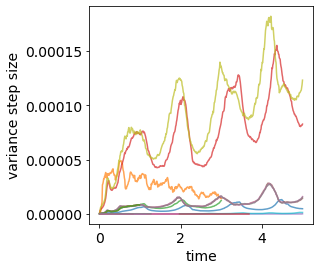

In [15]:
fig, axs = plt.subplots(figsize = (4,4), ncols = 1)
bins = 30
axkwargs = {
    'fontsize':14,
    
}
hkwargs = {
    'color':'blue',#'orange',
    'cumulative':False,
    'stacked':True,
    'log':False,
    'density':False,
    'bins':bins
}

ax = axs
# color_lst = [None, None]
os.chdir(data_folder)
fn_lst = sorted([fn for fn in os.listdir() if fn.find('.csv')!=-1])
# fn_lst = !grep *.csv
#[fnA, fnB]

fn_lst_myneural2 = [] 
# color_lst = ['green']
# fn_lst = [ fnB]
os.chdir(data_folder)
color = None
# for color,fn in zip(color_lst,fn_lst):
for fn in fn_lst:
    df = pd.read_csv(fn)
    x_values = np.array(df['t'])
    
    y_values = np.array(df['stepsize_std']**2)
    ymean = np.mean(y_values)
    if ymean >= 1e-30:
        p = ax.plot(x_values, y_values, color=color, alpha=.7)
        clr = p[0].get_color()
    #     ax.fill_between(x_values, y_values-df['stepsize_std'],y_values+df['stepsize_std'], alpha=0.2, color=clr)
    ax.set_xlabel('time',**axkwargs)
    ax.set_ylabel('variance step size',**axkwargs)
#     ax.set_yscale('log')
    # plt.xticks(**axkwargs)
    ax.tick_params(labelsize=axkwargs['fontsize'])
    if (ymean >= 1e-9) & (ymean>= 1e-30):
        print(f"{ymean}, {fn}")
        fn_lst_myneural2.append(fn)
        

In [18]:

#all asynchronous methods
fn_lst_myneural2 = ['avi_es_fixed_lr_a_equal_b_spherical_mesh_100_mu_1.0_lambda_10.0_gamma_0.0_vscale_1.0_stepsizeinit_0.0001_salience_2_atolx_0.0001.csv',
 'avi_es_fixed_lr_a_equal_b_spherical_mesh_400_mu_1.0_lambda_10.0_gamma_0.05_vscale_2.0_stepsizeinit_0.005_salience_2_atolx_0.0001.csv',
 'avi_es_fixed_lr_a_equal_b_spherical_mesh_64_mu_1.0_lambda_10.0_gamma_0.05_vscale_2.0_stepsizeinit_0.005_salience_2_atolx_0.0001.csv',
#  'avi_es_spherical_mesh_100_mu_1.0_lambda_10.0_gamma_0.0.csv',
 'avi_es_variable_lr_a_equal_b_spherical_mesh_400_mu_1.0_lambda_10.0_gamma_0.05_vscale_2.0_stepsizeinit_0.0025_salience_0.5_atolx_0.0001.csv',
 'avi_es_variable_lr_a_equal_b_spherical_mesh_400_mu_1.0_lambda_10.0_gamma_0.05_vscale_2.0_stepsizeinit_0.0025_salience_4_atolx_0.0001.csv',
 'avi_es_variable_lr_spherical_mesh_400_mu_1.0_lambda_10.0_gamma_0.05_vscale_2.0_salience_2_stepsizeinit_0.0025_atolx_0.0001_btolx_1e-05.csv'
                   ]



<ipython-input-19-a94d33ee2012>:64: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim([0.,0.015])


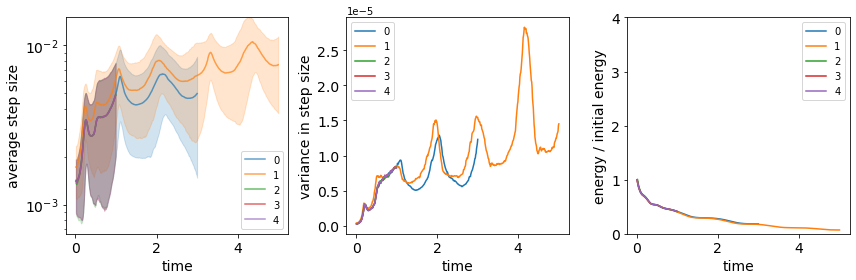

In [19]:
fig, axs = plt.subplots(figsize = (12,4), ncols = 3)
bins = 30
axkwargs = {
    'fontsize':14,
    
}
hkwargs = {
    'color':'blue',#'orange',
    'cumulative':False,
    'stacked':True,
    'log':False,
    'density':False,
    'bins':bins
}

# color_lst = [None, None]
fn_lst = fn_lst_myneural2[1:]
# fn_lst = [fn for fn in os.listdir() if fn.find('.csv')!=-1]
# fn_lst = !grep *.csv
#[fnA, fnB]
# color_lst = ['green']
# fn_lst = [ fnB]
os.chdir(data_folder)
color = None
# for color,fn in zip(color_lst,fn_lst):
for n,fn in enumerate(fn_lst):
    ax = axs[0]
    df = pd.read_csv(fn)
    x_values = np.array(df['t'])
    y_values = np.array(df['stepsize_mean'])
    p = ax.plot(x_values, y_values, color=color, alpha=.7, label=n)
    clr = p[0].get_color()
    ax.fill_between(x_values, y_values-df['stepsize_std'],y_values+df['stepsize_std'], alpha=0.2, color=clr)
    ax.set_xlabel('time',**axkwargs)
    ax.set_ylabel('average step size',**axkwargs)
    ax.set_yscale('log')
    # plt.xticks(**axkwargs)
    ax.tick_params(labelsize=axkwargs['fontsize'])

    ax = axs[1]
    x_values = np.array(df['t'])
    y_values = np.array(df['stepsize_std']**2)
    ax.plot(x_values, y_values, color=color, label=n)
    # ax.fill_between(x_values, y_values-stepsize_std_lst,y_values+stepsize_std_lst, alpha=0.2)
    ax.set_xlabel('time',**axkwargs)
    ax.set_ylabel('variance in step size',**axkwargs)
    ax.tick_params(labelsize=axkwargs['fontsize'])
    ax.legend()

    ax = axs[2]
    energy_lst = list(df['energy'].values)
    x_values = np.array(df['t'])
    y_values = np.array(energy_lst)/energy_lst[0]#[s**2/m for s,m in zip(stepsize_std_lst,stepsize_mean_lst)])
    ax.plot(x_values, y_values, color=color, label=n)
    # ax.fill_between(x_values, y_values-stepsize_std_lst,y_values+stepsize_std_lst, alpha=0.2)
    ax.set_xlabel('time',**axkwargs)
    ax.set_ylabel('energy / initial energy',**axkwargs)
    ax.tick_params(labelsize=axkwargs['fontsize'])
    ax.set_ylim([0,4])
    ax.legend()
    
    
ax = axs[0]
ax.set_ylim([0.,0.015])
ax.legend()
# ax = axs[2]
# x_values = np.array(tme_lst)
# y_values = np.array(volume_lst)/volume_lst[0]#[s**2/m for s,m in zip(stepsize_std_lst,stepsize_mean_lst)])
# ax.plot(x_values, y_values)
# # ax.fill_between(x_values, y_values-stepsize_std_lst,y_values+stepsize_std_lst, alpha=0.2)
# ax.set_xlabel('time',**axkwargs)
# ax.set_ylabel('volume / initial volume',**axkwargs)
# ax.tick_params(labelsize=axkwargs['fontsize'])

plt.tight_layout()
plt.show()

In [20]:
#all synchronous methods
fn_lst_myneural = ['avi_ns_a_equal_b_spherical_mesh_100_mu_1.0_lambda_1.0_gamma_0.0vscale_2.0_stepsizeinit_0.005.csv',
 'avi_ns_a_equal_b_spherical_mesh_100_mu_1.0_lambda_1.0_gamma_0.0vscale_2.0_stepsizeinit_0.005_salience_32.csv',
 'avi_ns_a_equal_b_spherical_mesh_100_mu_1.0_lambda_1.0_gamma_0.0vscale_2.0_stepsizeinit_0.005_salience_32_atolx_0.0001.csv',
 'avi_ns_a_equal_b_spherical_mesh_100_mu_1.0_lambda_1.0_gamma_0.0vscale_2.0_stepsizeinit_5e-05_salience_128_atolx_0.0001.csv',
 'avi_ns_a_equal_b_spherical_mesh_100_mu_1.0_lambda_10.0_gamma_0.0vscale_2.0_stepsizeinit_0.005.csv',
 'avi_ns_spherical_mesh_100_mu_1.0_lambda_10.0_gamma_0.0.csv']


FileNotFoundError: [Errno 2] File avi_ns_a_equal_b_spherical_mesh_100_mu_1.0_lambda_1.0_gamma_0.0vscale_2.0_stepsizeinit_0.005.csv does not exist: 'avi_ns_a_equal_b_spherical_mesh_100_mu_1.0_lambda_1.0_gamma_0.0vscale_2.0_stepsizeinit_0.005.csv'

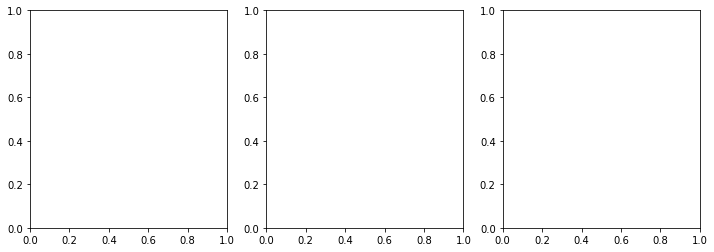

In [21]:
fig, axs = plt.subplots(figsize = (12,4), ncols = 3)
bins = 30
axkwargs = {
    'fontsize':14,
    
}
hkwargs = {
    'color':'blue',#'orange',
    'cumulative':False,
    'stacked':True,
    'log':False,
    'density':False,
    'bins':bins
}

ax = axs[0]
# color_lst = [None, None]
fn_lst = fn_lst_myneural#2
# fn_lst = [fn for fn in os.listdir() if fn.find('.csv')!=-1]
# fn_lst = !grep *.csv
#[fnA, fnB]
# color_lst = ['green']
# fn_lst = [ fnB]
os.chdir(data_folder)
color = None
# for color,fn in zip(color_lst,fn_lst):
for fn in fn_lst:
    ax = axs[0]
    df = pd.read_csv(fn)
    x_values = np.array(df['t'])
    y_values = np.array(df['stepsize_mean'])
    ax.plot(x_values, y_values, color=color, alpha=1.)
#     ax.fill_between(x_values, y_values-df['stepsize_std'],y_values+df['stepsize_std'], alpha=0.2, color=color)
    ax.set_xlabel('time',**axkwargs)
    ax.set_ylabel('average step size',**axkwargs)
#     ax.set_yscale('log')
    # plt.xticks(**axkwargs)
    ax.tick_params(labelsize=axkwargs['fontsize'])

    ax = axs[1]
    x_values = np.array(df['t'])
    y_values = np.array(df['stepsize_std']**2)
    ax.plot(x_values, y_values, color=color)
    # ax.fill_between(x_values, y_values-stepsize_std_lst,y_values+stepsize_std_lst, alpha=0.2)
    ax.set_xlabel('time',**axkwargs)
    ax.set_ylabel('variance in step size',**axkwargs)
    ax.tick_params(labelsize=axkwargs['fontsize'])

    ax = axs[2]
    energy_lst = list(df['energy'].values)
    x_values = np.array(df['t'])
    y_values = np.array(energy_lst)/energy_lst[0]#[s**2/m for s,m in zip(stepsize_std_lst,stepsize_mean_lst)])
    ax.plot(x_values, y_values, color=color)
    # ax.fill_between(x_values, y_values-stepsize_std_lst,y_values+stepsize_std_lst, alpha=0.2)
    ax.set_xlabel('time',**axkwargs)
    ax.set_ylabel('energy / initial energy',**axkwargs)
    ax.tick_params(labelsize=axkwargs['fontsize'])
    ax.set_ylim([0,4])
    
ax = axs[0]
# ax.set_ylim([0.,0.015])
# ax = axs[2]
# x_values = np.array(tme_lst)
# y_values = np.array(volume_lst)/volume_lst[0]#[s**2/m for s,m in zip(stepsize_std_lst,stepsize_mean_lst)])
# ax.plot(x_values, y_values)
# # ax.fill_between(x_values, y_values-stepsize_std_lst,y_values+stepsize_std_lst, alpha=0.2)
# ax.set_xlabel('time',**axkwargs)
# ax.set_ylabel('volume / initial volume',**axkwargs)
# ax.tick_params(labelsize=axkwargs['fontsize'])

plt.tight_layout()
plt.show()

# this list looks reasonable

In [148]:
fn_lst_my_neural3 = sorted(np.array(fn_lst_myneural2[1:])[np.array([0,1,3,4,5])])
fn_lst_my_neural3

['avi_es_fixed_lr_a_equal_b_spherical_mesh_100_mu_1.0_lambda_10.0_gamma_0.0_vscale_1.0_stepsizeinit_0.0001_salience_2_atolx_0.0001.csv',
 'avi_es_fixed_lr_a_equal_b_spherical_mesh_400_mu_1.0_lambda_10.0_gamma_0.05_vscale_2.0_stepsizeinit_0.005_salience_2_atolx_0.0001.csv',
 'avi_es_fixed_lr_a_equal_b_spherical_mesh_64_mu_1.0_lambda_10.0_gamma_0.05_vscale_2.0_stepsizeinit_0.01_salience_2_atolx_0.0001.csv',
 'avi_es_fixed_lr_a_equal_b_spherical_mesh_64_mu_1.0_lambda_10.0_gamma_0.05_vscale_2.0_stepsizeinit_0.02_salience_2_atolx_0.0001.csv',
 'avi_es_fixed_lr_a_equal_b_spherical_mesh_64_mu_1.0_lambda_10.0_gamma_0.05_vscale_2.0_stepsizeinit_0.02_salience_2_atolx_0.001.csv']

In [149]:
targ = 'spherical_mesh_'
loc = fnA.find(targ)
mesh_size = eval(fnA[loc+len(targ):].split('_')[0])

mesh_folder = os.path.join(nb_dir,'../data/spherical_meshes')
os.chdir(mesh_folder)
mesh_fn = f"spherical_mesh_{mesh_size}.stl"

<ipython-input-152-066590cc767f>:65: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim([0.,0.015])


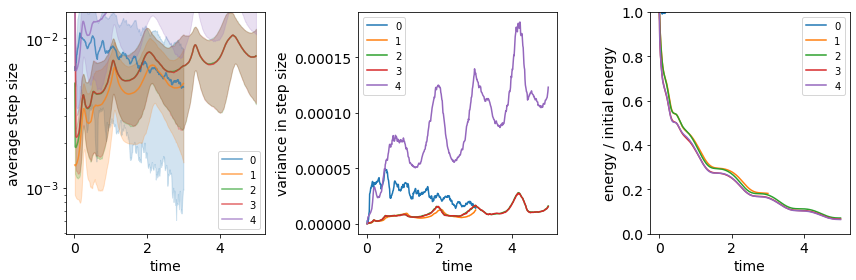

In [152]:
fig, axs = plt.subplots(figsize = (12,4), ncols = 3)
bins = 30
axkwargs = {
    'fontsize':14,
    
}
hkwargs = {
    'color':'blue',#'orange',
    'cumulative':False,
    'stacked':True,
    'log':False,
    'density':False,
    'bins':bins
}

# color_lst = [None, None]
salience2 = [0,1,4]#fn where slaience is equal to two
fn_lst = np.array(fn_lst_my_neural3)#[salience2]
# fn_lst = [fn for fn in os.listdir() if fn.find('.csv')!=-1]
# fn_lst = !grep *.csv
#[fnA, fnB]
# color_lst = ['green']
# fn_lst = [ fnB]
os.chdir(data_folder)
color = None
# for color,fn in zip(color_lst,fn_lst):
for n,fn in enumerate(fn_lst):
    ax = axs[0]
    df = pd.read_csv(fn)
    x_values = np.array(df['t'])
    y_values = np.array(df['stepsize_mean'])
    p = ax.plot(x_values, y_values, color=color, alpha=.7, label=n)
    clr = p[0].get_color()
    ax.fill_between(x_values, y_values-df['stepsize_std'],y_values+df['stepsize_std'], alpha=0.2, color=clr)
    ax.set_xlabel('time',**axkwargs)
    ax.set_ylabel('average step size',**axkwargs)
    ax.set_yscale('log')
    # plt.xticks(**axkwargs)
    ax.tick_params(labelsize=axkwargs['fontsize'])

    ax = axs[1]
    x_values = np.array(df['t'])
    y_values = np.array(df['stepsize_std']**2)
    ax.plot(x_values, y_values, color=color, label=n)
    # ax.fill_between(x_values, y_values-stepsize_std_lst,y_values+stepsize_std_lst, alpha=0.2)
    ax.set_xlabel('time',**axkwargs)
    ax.set_ylabel('variance in step size',**axkwargs)
    ax.tick_params(labelsize=axkwargs['fontsize'])
    ax.legend()

    ax = axs[2]
    energy_lst = list(df['energy'].values)
    x_values = np.array(df['t'])
    y_values = np.array(energy_lst)/energy_lst[0]#[s**2/m for s,m in zip(stepsize_std_lst,stepsize_mean_lst)])
    ax.plot(x_values, y_values, color=color, label=n)
    # ax.fill_between(x_values, y_values-stepsize_std_lst,y_values+stepsize_std_lst, alpha=0.2)
    ax.set_xlabel('time',**axkwargs)
    ax.set_ylabel('energy / initial energy',**axkwargs)
    ax.tick_params(labelsize=axkwargs['fontsize'])
    ax.set_ylim([0,1])
    ax.legend()
    
    
ax = axs[0]
ax.set_ylim([0.,0.015])
ax.legend()

ax = axs[2]
gamma = 0.05
yt_values = np.exp((1-gamma)*x_values)
ax.plot(x_values, yt_values, color=color, label='theory')

    

plt.tight_layout()
plt.show()

In [151]:
fn_lst_my_neural3[:3]


['avi_es_fixed_lr_a_equal_b_spherical_mesh_100_mu_1.0_lambda_10.0_gamma_0.0_vscale_1.0_stepsizeinit_0.0001_salience_2_atolx_0.0001.csv',
 'avi_es_fixed_lr_a_equal_b_spherical_mesh_400_mu_1.0_lambda_10.0_gamma_0.05_vscale_2.0_stepsizeinit_0.005_salience_2_atolx_0.0001.csv',
 'avi_es_fixed_lr_a_equal_b_spherical_mesh_64_mu_1.0_lambda_10.0_gamma_0.05_vscale_2.0_stepsizeinit_0.01_salience_2_atolx_0.0001.csv',
 'avi_es_fixed_lr_a_equal_b_spherical_mesh_64_mu_1.0_lambda_10.0_gamma_0.05_vscale_2.0_stepsizeinit_0.02_salience_2_atolx_0.0001.csv',
 'avi_es_fixed_lr_a_equal_b_spherical_mesh_64_mu_1.0_lambda_10.0_gamma_0.05_vscale_2.0_stepsizeinit_0.02_salience_2_atolx_0.001.csv']

__Results__ 
- salience does not appear to controll the qualitative difference in these plots

0.0001
0.0001
0.0001
0.0001
0.001


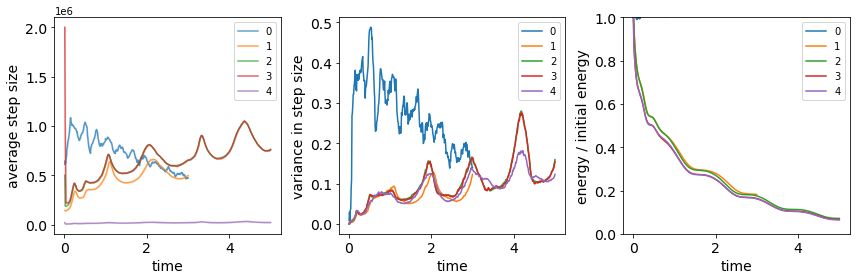

In [175]:
fig, axs = plt.subplots(figsize = (12,4), ncols = 3)
bins = 30
axkwargs = {
    'fontsize':14,
    
}
hkwargs = {
    'color':'blue',#'orange',
    'cumulative':False,
    'stacked':True,
    'log':False,
    'density':False,
    'bins':bins
}

# color_lst = [None, None]
salience2 = [0,1,4]#fn where slaience is equal to two
fn_lst = np.array(fn_lst_my_neural3)#[salience2]
# fn_lst = [fn for fn in os.listdir() if fn.find('.csv')!=-1]
# fn_lst = !grep *.csv
#[fnA, fnB]
# color_lst = ['green']
# fn_lst = [ fnB]
os.chdir(data_folder)
color = None
# for color,fn in zip(color_lst,fn_lst):
for n,fn in enumerate(fn_lst):
    
    targ = 'atolx'
    loc = fn.find(targ)
    atolx = eval(fn[loc+len(targ):].split('_')[1].split('.csv')[0])
    print(atolx)
    ax = axs[0]
    df = pd.read_csv(fn)
    x_values = np.array(df['t'])
    y_values = np.array(df['stepsize_mean'])/atolx**2
    p = ax.plot(x_values, y_values, color=color, alpha=.7, label=n)
    clr = p[0].get_color()
    ax.fill_between(x_values, y_values-df['stepsize_std'],y_values+df['stepsize_std'], alpha=0.2, color=clr)
    ax.set_xlabel('time',**axkwargs)
    ax.set_ylabel('average step size',**axkwargs)
#     ax.set_yscale('log')
    # plt.xticks(**axkwargs)
    ax.tick_params(labelsize=axkwargs['fontsize'])

    ax = axs[1]
    x_values = np.array(df['t'])
    y_values = np.array(df['stepsize_std']**2)/atolx
    ax.plot(x_values, y_values, color=color, label=n)
    # ax.fill_between(x_values, y_values-stepsize_std_lst,y_values+stepsize_std_lst, alpha=0.2)
    ax.set_xlabel('time',**axkwargs)
    ax.set_ylabel('variance in step size',**axkwargs)
    ax.tick_params(labelsize=axkwargs['fontsize'])
    ax.legend()

    ax = axs[2]
    energy_lst = list(df['energy'].values)
    x_values = np.array(df['t'])
    y_values = np.array(energy_lst)/energy_lst[0]#[s**2/m for s,m in zip(stepsize_std_lst,stepsize_mean_lst)])
    ax.plot(x_values, y_values, color=color, label=n)
    # ax.fill_between(x_values, y_values-stepsize_std_lst,y_values+stepsize_std_lst, alpha=0.2)
    ax.set_xlabel('time',**axkwargs)
    ax.set_ylabel('energy / initial energy',**axkwargs)
    ax.tick_params(labelsize=axkwargs['fontsize'])
    ax.set_ylim([0,1])
    ax.legend()
    
    
ax = axs[0]
# ax.set_ylim([0.,0.015])
ax.legend()

ax = axs[2]
gamma = 0.05
yt_values = np.exp((1-gamma)*x_values)
ax.plot(x_values, yt_values, color=color, label='theory')

    

plt.tight_layout()
plt.show()

SyntaxError: EOL while scanning string literal (<ipython-input-168-bcebfae9a5f2>, line 1)

# TODO: plot element volume versus stepsize

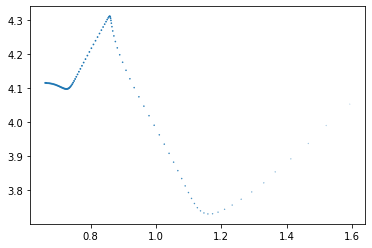

In [22]:
y_values = df['volume']
x_values = df['energy']
c_values = df['t']
plt.scatter(x_values,y_values,c_values,cmap='Blues')

# TODO: plots contrasting methods and synchronous/asynchronous

In [ ]:
#asynchronous
"implicit_asynch_fixed_lr_spherical_mesh_400_mu_1.0_lambda_10.0_gamma_0.0vscale_2.0_stepsizeinit_0.0001_salience_2_atolx_0.0001.csv"


In [ ]:
#synchronous
"avi_es_fixed_lr_a_equal_b_spherical_mesh_100_mu_1.0_lambda_10.0_gamma_0.0_vscale_2.0_stepsizeinit_0.0001_salience_2_atolx_0.0001.csv"